# Training a Neural Network with Stochastic Gradient Descent

In this notebook we will implement a stochastic gradient descent learning algorithm for a feedforward neural network. To do so we will adapt the code included with the book "[Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)" by Michael Nielsen. The code below is based on the [version and adapted to work with Python 3](https://github.com/MichalDanielDobrzanski/DeepLearningPython) by Michal Daniel Dobrzanski.

First, we load some standard Python libraries.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

We now define our activation function and another function to compute its derivative

In [2]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

Next, we define a class "Network" that will represent our neural network. The implementation of the class is given below, but some crucial parts have been left out and replaced with a comment "FILL IN HERE". We will add them in bit-by-bit.

In [3]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [0 # FILL IN HERE #derivative of cost wrt bias and weights via backprop
                       for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [0 # FILL IN HERE
                       for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [0 # FILL IN HERE#grad descent work out new value w, b from old and change
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [0 # FILL IN HERE
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = 0 # FILL IN HERE
            zs.append(z)
            activation = 0 # FILL IN HERE
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = 0 # FILL IN HERE
            nabla_b[-l] = 0 # FILL IN HERE
            nabla_w[-l] = 0 # FILL IN HERE
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

Now let's look at an example use case. We will create an instance of the Network class and train it with the training data. The training data we will use is from the example in "Deep Learning: An introduction for applied mathematicians", by C.Higham and D.Higham. This represents a set of blue and red points on the x-y plane.

In [4]:
X = np.array([[[0.1],[0.1]],
              [[0.3],[0.4]],
              [[0.1],[0.5]],
              [[0.6],[0.9]],
              [[0.4],[0.2]],
              [[0.6],[0.3]],
              [[0.5],[0.6]],
              [[0.9],[0.2]],
              [[0.4],[0.4]],
              [[0.7],[0.6]]])
Y = np.array([[[1.0], [0.0]],
              [[1.0], [0.0]],
              [[1.0], [0.0]],
              [[1.0], [0.0]],
              [[1.0], [0.0]],
              [[0.0], [1.0]],
              [[0.0], [1.0]],
              [[0.0], [1.0]],
              [[0.0], [1.0]],
              [[0.0], [1.0]]])

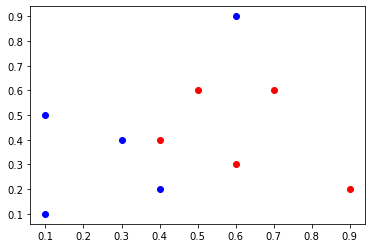

In [5]:
plt.scatter(X[:5,0], X[:5,1], color='blue')
plt.scatter(X[5:,0], X[5:,1], color='red')

plt.show()

Now we will create a neural network to decide whether a point should be blue or red. We will have two hidden layers, each with 3 neurons. The input layer will by an (x,y) coordinate and the output will be a pair of numbers representing blue or red.

In [ ]:
net = # FILL IN HERE

We now train this network with the training data. Train for 10,000 iterations with a batch size of 1 and a rate of $\eta$=0.05

In [ ]:
# FILL IN HERE

Visualise the result

In [ ]:
xx = np.linspace(0,1,100)
yy = np.linspace(0,1,100)
XX, YY = np.meshgrid(xx,yy)
ZZ = np.zeros(XX.shape)
for i in range(100):
    for j in range(100):
        ZZ[j,i] = net.feedforward(np.array([[xx[i]], [yy[j]]]))[1]


plt.contour(XX,YY,ZZ, levels=[0.5])
plt.scatter(X[:5,0], X[:5,1], color='blue')
plt.scatter(X[5:,0], X[5:,1], color='red')


plt.show()

Now we will create and train a network to recognise handwritten digits. First, we load the training data:

In [ ]:
import mnist_loader

In [ ]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Now create a network with a single hidden layer with 30 neurons

In [ ]:
net = # FILL IN HERE

Train the network for 10 epochs with a batch size of 10 and a rate of $\eta=3.0$. Use test_data for testing.

In [ ]:
# FILL IN HERE